In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import string
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from gensim.models import Word2Vec
from gensim.models import KeyedVectors

In [ ]:
trainFile=pd.read_csv("../input/stance-detection/train_merged.csv",encoding='latin-1')
testFile=pd.read_csv('../input/stance-detection/test_merged.csv', encoding='latin-1')

In [ ]:
len(testFile)

In [ ]:
train_body_fea_mat= pd.read_csv("../input/extracted-feature-matrix-fnc/gw2v_train_body_feat_mat.csv")
train_head_fea_mat= pd.read_csv("../input/extracted-feature-matrix-fnc/gw2v_train_head_features_mat.csv")
print ("ok")

In [ ]:
train_body_fea_mat= train_body_fea_mat['0.01445741 -0.00307663 0.03460778 0.03005492 -0.02551278 -0.06243509 0.04546816 -0.10801414 0.09996711 0.03248419 0.01209181 -0.09520388 -0.00982388 0.03738437 -0.06758876 0.04704023 -0.01656388 0.11457517 0.02389510 -0.02209627 -0.03152477 0.02129975 -0.01977231 -0.04103940 0.03489426 -0.08884864 -0.06009731 0.02769411 0.01813629 -0.04866458 -0.04326693 -0.05779993 -0.03087211 -0.06567015 -0.01998979 -0.05742331 0.00217349 0.01424252 -0.02167081 0.06756297 0.00272854 -0.04664367 0.09779887 0.03806252 -0.03711294 -0.05890913 -0.04634963 -0.02448960 0.02305182 0.03363969 0.00456221 0.00777783 0.00823334 -0.03853019 -0.04292373 0.05254923 -0.03918284 -0.02941715 0.00302493 -0.10687905 -0.06049334 0.01985276 -0.06721916 -0.04399910 -0.02546776 -0.00330120 0.01436185 0.03307738 -0.01772229 0.05335366 -0.05677884 -0.05903850 0.07897005 0.00491599 -0.17756046 -0.00561540 0.05150153 0.02598555 0.01213076 0.03505087 0.05733090 -0.01045514 0.04592255 -0.03697641 -0.05712924 -0.09313897 -0.03123221 0.04235587 0.02598074 0.04141235 0.02752230 -0.05916673 -0.05470461 0.00708227 -0.04116895 0.00457566 0.09658504 0.04496875 0.06864407 -0.06283517 0.01315324 0.00498027 0.00663764 -0.00482818 0.08676459 0.00637775 0.01987175 -0.05275053 -0.01208436 -0.10167580 -0.02939195 -0.00490012 0.04500744 -0.03751105 0.02489993 -0.00268268 0.02533853 0.03359517 0.07755849 0.01832142 -0.06426614 -0.00116405 -0.06527280 0.03478039 -0.03195679 0.00789457 -0.02229531 -0.06718968 0.01916217 0.03520215 -0.03322302 -0.06674753 -0.03794018 -0.00362793 -0.00848136 -0.03617857 0.00195595 -0.01887922 -0.00803114 0.10603198 -0.02782383 -0.04280946 0.00497253 0.02761015 0.05464476 0.03948070 -0.02151911 -0.07648571 -0.04990637 -0.01823008 0.09771417 -0.03288025 -0.09315857 0.08510427 0.06610023 -0.02968130 -0.00020595 -0.06208721 -0.00949531 0.00832148 0.02025286 0.06913015 0.06112899 -0.02743638 0.04178986 0.00308046 0.09779290 0.00258139 0.06851036 0.01755587 -0.02945981 0.01171525 -0.00323904 -0.03667808 -0.01734293 -0.06648077 0.05177741 -0.00949164 -0.05447548 -0.00088533 -0.08516557 -0.04400609 0.02303672 -0.04285395 0.02652837 -0.04478653 -0.02003160 0.02508933 0.02201633 0.04647970 0.03189264 0.02626720 0.01487728 0.04068594 -0.10336331 0.08566874 0.04362105 -0.03208637 0.00539090 -0.05129364 0.06536650 0.03719524 -0.05961225 -0.05206961 0.04150531 -0.01251035 0.04675419 0.03631954 -0.01037996 -0.03292282 -0.01449147 -0.00974560 0.00768710 0.01712968 -0.07364988 0.04370674 0.05140302 0.03370679 -0.05623327 0.02640748 0.03365018 -0.00448322 -0.00933904 -0.02580539 0.01133435 -0.07993806 0.05387444 0.10420556 0.04853940 0.00350906 0.04709351 -0.01886109 -0.03079173 0.00943701 0.04559432 -0.00805605 -0.00047985 -0.06886871 0.08561782 -0.02602374 0.03824465 -0.04946849 -0.02711782 -0.08843448 -0.01731021 0.00425505 0.01408951 0.01787660 0.04197189 -0.05142706 -0.02007633 -0.03616919 0.02320301 0.04072613 0.10985401 -0.08842291 0.02103239 -0.03709850 -0.05760243 -0.07886400 -0.00178642 -0.05893956 -0.03952490 0.05094328 0.05003129 0.12407389 -0.02587410 -0.00500054 -0.02362105 0.02030189 -0.01553054 0.01393666 0.03121636 0.00140222 -0.00396290 -0.02652964 -0.01461516 -0.03849268 0.01538912 -0.00206044 -0.01740918 0.00755116 0.04064047 0.04872068 0.02970222 -0.08556548 -0.04653324 0.05720954 0.01288432 0.04675238 -0.03980065 -0.02186162 -0.09192041 0.04189581 0.02341233 0.00616469 -0.02715129 -0.04470300 0.07297642 -0.04325169']

In [ ]:
train_head_fea_mat= train_head_fea_mat['0.14486694 0.11557007 0.06503296 0.10539246 0.01501465 -0.16548157 0.04415894 -0.15661621 0.18893433 0.16527748 0.07154846 -0.12877274 -0.03910637 0.08666992 0.02719116 -0.03155518 -0.05326843 0.04110718 0.01632690 -0.19592285 0.04180908 0.15525055 0.02152252 -0.05328369 -0.10021973 -0.04183960 -0.04109192 -0.05368042 0.15682220 -0.14575195 -0.06622314 -0.10023499 -0.12075806 -0.10803223 -0.02571106 -0.17192078 0.09480667 0.11508179 -0.13950539 0.03924561 -0.00764465 -0.11322784 0.25952148 -0.15139771 -0.01512146 -0.02626038 -0.12581635 -0.03308105 -0.08361816 0.02482033 0.00130844 -0.04386902 0.01696014 0.00695801 -0.00871468 -0.12615967 -0.03115845 -0.03234863 -0.08196640 -0.16789246 -0.02830505 -0.01464844 0.05176544 -0.05773926 -0.12954712 0.08679199 0.06052399 -0.09313965 -0.09535980 -0.06533813 -0.01141757 0.06017303 0.07421875 0.00283813 -0.28634644 -0.12450027 0.09947968 -0.10101318 0.07447052 0.02374268 0.08050537 -0.01724243 0.08918762 0.01840973 -0.13452148 0.05062866 -0.03900909 0.04826355 -0.05139923 -0.00787354 -0.02491760 0.01025391 0.01919556 -0.11351013 -0.07659912 0.05349731 0.14183426 -0.08499146 -0.01260376 -0.06047058 -0.06738281 -0.07977295 0.09747314 -0.11892700 -0.02661133 -0.09631348 -0.00631714 -0.07122803 -0.02391052 -0.05540466 -0.03704834 0.00860596 0.05703735 -0.08901978 0.06869507 -0.12619019 -0.09484863 0.00277710 0.07837677 0.11423492 0.01885986 -0.03637695 0.05310059 -0.06874084 -0.02982712 -0.03887939 -0.14073181 -0.14317513 0.02568054 -0.06611633 0.11125565 -0.10430908 -0.11676788 0.04679108 -0.03262329 -0.01869202 0.01353455 -0.11560059 -0.09034729 0.11569214 -0.08324051 0.10086060 0.05457306 0.06581116 -0.08534241 -0.05870056 -0.03643417 -0.13286591 -0.06536865 -0.12843323 0.18974304 0.05319214 0.14326477 0.00193787 -0.04945374 -0.03875732 0.05186462 -0.02989197 0.02252197 -0.15817261 -0.13809204 -0.00817871 0.08467102 -0.11425781 -0.14025879 -0.01335144 0.07397461 -0.02688599 0.18310547 0.08799744 0.00178528 -0.10005283 -0.02728271 -0.25906372 -0.01099396 -0.09247398 -0.06025696 -0.05077362 -0.04557037 -0.02537537 -0.08000183 -0.01004028 0.03031921 -0.09323120 -0.11553955 -0.10845947 0.16310883 0.09714508 -0.00375366 0.07604980 0.03097534 -0.04851532 0.05035400 -0.00396729 0.00112915 0.14874268 -0.07659912 -0.00439453 0.04446411 0.00951385 0.14952087 -0.04526520 -0.08522034 -0.04788208 -0.01977539 -0.18275833 0.04284668 -0.07028198 -0.07730103 -0.24186707 -0.06459808 0.07202148 0.04454422 -0.08404541 -0.20978546 0.02845764 -0.02881622 0.05174589 -0.14660645 -0.07697868 -0.06890869 -0.03768539 0.01867676 -0.08562851 0.03867722 0.04925632 0.06850052 0.13348389 0.16613770 -0.07809448 -0.03601074 -0.07507324 -0.11886978 0.18844604 0.10046387 -0.03021240 0.04337311 0.04017639 0.14411926 0.07408285 0.08576202 0.01779175 -0.16708374 -0.16839600 -0.03009796 0.10716248 -0.01550293 0.05873811 0.10225296 0.01602173 -0.10140991 0.08969116 0.09335327 0.07604980 0.14541626 0.01123047 0.11059570 -0.10155773 -0.02493477 -0.09390259 -0.00411987 0.00903320 -0.00853729 -0.03320312 0.03508759 0.11653519 -0.08743477 -0.02470064 -0.17443848 0.04499817 -0.03534698 0.09770203 0.05191040 -0.09683990 0.11801910 -0.02854919 -0.04934692 0.06970215 -0.14596558 0.08360291 -0.09091949 -0.14488220 -0.06718254 0.11041260 0.10960388 -0.06162739 -0.10806656 0.14804077 0.16159058 0.15737915 -0.08882904 -0.14535522 -0.17446899 0.10157776 -0.04349136 0.04476166 -0.16305542 -0.09733200 0.04874420 0.12344360']

In [ ]:
gw2v_train_body_fea_mat= []
gw2v_train_head_fea_mat= []

In [ ]:

for i in range(len(train_body_fea_mat)):
    gw2v_train_body_fea_mat.append(train_body_fea_mat[i].split())
    gw2v_train_head_fea_mat.append(train_head_fea_mat[i].split())


In [ ]:
gw2v_train_body_fea_mat= np.array(gw2v_train_body_fea_mat, dtype=float)
gw2v_train_head_fea_mat= np.array(gw2v_train_head_fea_mat, dtype=float)
# train_body_fea_mat= np.array(train_body_fea_mat.split()).astype("float")

In [ ]:
type(gw2v_train_body_fea_mat[0][0])


In [ ]:
test_body_fea_mat= pd.read_csv("../input/extracted-feature-matrix-fnc/gw2v_test_body_feat_mat.csv")
test_head_fea_mat= pd.read_csv("../input/extracted-feature-matrix-fnc/gw2v_test_head_feat_mat.csv")
print ("ok")

train_hand_features_mat= pd.read_csv("../input/extracted-feature-matrix-fnc/train_hand_features.csv")
test_hand_features_mat= pd.read_csv("../input/extracted-feature-matrix-fnc/test_hand_features.csv")

In [ ]:
print(len(train_hand_features_mat), len(test_hand_features_mat))

In [ ]:
test_body_fea_mat= test_body_fea_mat['0.00147465 -0.04509481 -0.14276801 -0.06553141 -0.03098382 -0.00682237 0.07634142 -0.04966397 0.07568190 0.05384657 -0.18527561 -0.06853570 -0.10538737 0.02069770 0.00566949 0.01620907 0.00965712 -0.02243381 0.07554796 -0.04080200 0.05487739 0.05018446 0.00592719 0.11886936 0.00824653 -0.00417074 -0.03447808 0.07516819 -0.03061252 -0.01407878 0.02345106 -0.23082140 -0.12276883 0.04262967 -0.03725476 -0.01861572 0.07035319 0.04448785 -0.06511773 -0.02294922 -0.01955838 0.05159505 0.04682075 -0.01103380 0.07748752 -0.04774306 -0.09654405 0.01937527 0.03586155 0.04735650 0.07118056 -0.03118896 -0.06765408 0.03222656 -0.09484863 0.10610623 -0.06184557 0.01095115 0.01307509 -0.13948568 -0.01121691 0.06486003 0.06631809 -0.02132840 0.02479384 -0.03355577 -0.07078383 0.02936469 -0.11745877 -0.01435004 -0.19569906 0.00554742 0.01014540 0.11591254 -0.03349813 -0.17028130 0.07307943 0.00612047 0.00679525 0.06664191 -0.01171875 -0.04599338 -0.12600369 0.03610569 -0.00655111 -0.05563694 -0.04999457 0.14710829 -0.01925151 -0.06035699 0.03697374 0.04747179 -0.12708876 -0.10273573 -0.08977593 -0.10131836 0.04587131 0.15186903 0.01277669 0.08299425 0.07693821 -0.09944661 -0.00471666 -0.02806261 0.02058919 -0.06296115 0.02604167 -0.10739475 -0.13601345 -0.06936306 0.00587294 -0.03259277 0.02625868 0.02988010 0.02913411 -0.14692518 0.11018880 0.06351725 0.21451823 -0.02224392 -0.07964410 0.03092448 -0.07261827 0.02118598 0.06720988 -0.11272515 -0.04822286 -0.08542548 0.02708096 -0.03209093 0.00851780 -0.05852593 0.06857639 -0.03835720 -0.03473663 -0.04608832 0.05523003 0.00103760 0.04827881 0.03000217 0.00857205 -0.07336087 -0.00125461 0.00168186 0.07539876 -0.03019206 -0.06504991 -0.07543945 -0.04307387 0.09014893 0.17730035 0.02772352 -0.04054091 -0.13427734 0.01598104 -0.00168186 -0.03146701 -0.08780924 -0.00644260 0.09011502 0.01923286 -0.01699744 0.00876194 -0.09375000 0.00740560 -0.16807726 0.05775282 0.00606367 0.01481798 -0.01988390 -0.03070747 -0.01347521 -0.05691189 -0.03564453 0.08945380 -0.11310493 0.11257595 -0.10313585 -0.16735840 -0.10460069 -0.07033963 0.00161404 -0.05996365 -0.05495877 0.03993056 -0.09547933 -0.07770454 -0.00732761 0.07261827 0.04036458 -0.06835938 0.02342394 0.02246772 -0.02191840 -0.06117079 0.08544922 0.07241821 -0.03173828 0.05525716 -0.09440104 0.00521512 -0.00385200 -0.04629178 -0.05289714 -0.01782227 0.06892904 0.07238939 0.03773329 -0.04818090 -0.00244141 -0.03656684 0.08214484 0.07333713 0.13550313 0.00259738 -0.08675130 0.05652830 0.09456889 -0.02332899 -0.09669325 0.06522624 -0.08380805 -0.04481337 0.05946181 0.05699327 0.03910319 0.06038411 0.00557433 0.18843587 -0.11889648 0.10129123 -0.00495063 -0.01512485 0.09198676 0.06617567 -0.09440104 0.03154839 0.01907688 0.12730577 -0.05466037 0.13910590 -0.04833306 -0.04673555 -0.07892524 -0.02031793 0.15275065 -0.02008735 0.03412543 -0.02311198 -0.07425944 0.06507704 -0.00320095 -0.02943251 -0.00264486 0.11981879 -0.02107069 0.02231937 -0.03571235 0.06431749 0.04759386 -0.00354004 -0.05204264 -0.03308784 0.06400553 0.13844469 -0.00743442 -0.17695618 -0.08078342 -0.04299588 -0.07194010 0.03548516 0.04315864 0.01719835 -0.02471246 0.09266324 -0.00503370 0.00943671 -0.05284288 0.06941393 -0.03301324 -0.08676656 0.13168674 -0.07405599 0.06328668 0.18886990 0.00629340 -0.08523220 0.15700955 0.01205783 -0.00600518 -0.03567166 -0.00017802 -0.11935764 -0.04425727 -0.07421875 0.08973524 -0.10526530 -0.04347907 -0.02099270 0.00506592']
test_head_fea_mat= test_head_fea_mat['-0.08763123 0.10746765 -0.14164734 0.05567932 -0.03216553 0.11724854 -0.00802612 0.02661133 0.12612915 0.09561157 -0.00341797 -0.08230591 0.11718750 0.02848816 -0.12774658 0.07438660 0.05243683 0.08004761 -0.06996155 -0.11445808 0.13092041 -0.10598755 0.01686478 0.00321960 -0.06077576 0.07724595 -0.06088257 0.18936157 0.04607201 -0.12609673 0.06752014 0.02096558 -0.04548264 -0.05556345 0.04424667 -0.19735718 0.01594543 -0.04332733 0.04904175 0.02859497 0.15148163 -0.01358032 0.06605530 -0.07480812 -0.02523804 -0.12597656 -0.10702515 -0.01071167 -0.01486206 -0.04435349 -0.03884888 0.07237244 0.06619263 0.00261688 -0.06180000 0.11285400 -0.09385681 -0.06626892 -0.07293701 -0.06336975 0.01467896 0.02685547 -0.05386353 -0.01293945 -0.07267761 -0.00474548 -0.05772400 0.01938629 -0.02682495 0.03739619 0.12432861 0.04243469 0.16946411 -0.09133148 -0.08596802 -0.22845078 0.09944916 -0.13501740 -0.06654739 -0.00390625 0.06484985 -0.04873657 -0.08225250 -0.07052612 0.00019073 -0.13270569 0.11322021 0.06455231 -0.04550171 0.10485840 -0.08706665 -0.00577545 -0.08071899 -0.00808716 -0.02976990 -0.14968872 0.02114487 -0.04591370 0.15318298 0.08163452 0.00081253 -0.06731415 0.03191185 -0.04136658 0.00487232 -0.07792664 0.00286865 -0.02354431 -0.02099228 -0.14668274 -0.01399231 0.10502481 -0.09259033 0.04710007 0.04627228 -0.03872681 -0.06982422 0.01007080 0.01034546 -0.05685425 0.04042053 0.03965616 -0.16580200 0.00887680 0.08257294 -0.12220764 -0.04608917 0.05748367 0.04296875 0.06818390 0.00000000 -0.03528595 -0.02560425 -0.04415894 -0.02272034 0.01628876 0.01089478 -0.02904129 -0.08927155 0.14233398 0.03945923 -0.05511475 -0.00964165 -0.05774689 -0.01959229 -0.02989960 0.19242859 -0.04660225 -0.04734802 -0.09769821 0.02990723 -0.06781006 0.13864136 0.04312134 0.04122925 0.00891113 -0.09848022 0.00281334 -0.15045166 0.01696777 0.01328278 0.08010864 -0.04318237 -0.06566620 -0.10003662 -0.05877686 0.09783936 -0.05389404 -0.08125687 0.00598145 -0.16577148 -0.03424072 -0.08569336 0.00155830 -0.11984253 0.02500916 0.15894318 -0.15032959 -0.01170349 0.07385254 -0.12126541 -0.11911011 0.00051880 -0.21539307 -0.03639221 -0.20158386 -0.11503601 0.06808472 -0.00904846 0.03805542 -0.09767914 0.01655579 -0.07421875 -0.03475952 -0.13700867 0.04150391 0.06115770 -0.12197876 -0.05437851 -0.06712341 0.08270645 0.07015228 0.02554321 0.08851624 0.03160095 0.02498245 -0.00242233 -0.01620483 -0.12094116 -0.02613831 0.07141113 0.11621857 -0.02943420 0.04260254 0.02857971 0.01971436 0.12377930 -0.02906799 -0.19851685 -0.10060883 -0.07506180 0.05343628 -0.02728271 0.02302551 -0.11751938 0.01956177 -0.02850342 0.07705688 0.00137329 -0.11959839 -0.05422974 -0.00197220 -0.07045746 -0.03970337 0.03399658 0.04577637 0.04719162 -0.06527710 0.09320831 -0.04132080 0.05221558 0.04921722 0.01084900 -0.09143066 -0.04451370 -0.05050659 -0.03710938 0.10057449 -0.00885010 -0.11596680 -0.12750244 0.25299072 0.09054565 -0.00668716 0.00695801 0.03836823 -0.03575134 -0.08789062 -0.01251602 0.07720947 0.04664898 -0.03351593 0.05267334 -0.03125000 0.05566406 0.07629395 -0.15997696 -0.06993103 -0.05243683 0.09204102 -0.06889343 0.10046387 0.09568787 0.11369514 0.14837646 -0.00881958 0.16705418 -0.11071777 -0.02450562 0.06435394 -0.15386963 0.11486816 -0.01109314 0.11654663 -0.00073242 0.03979492 -0.11801147 -0.06448936 0.08757019 0.08694458 0.03715897 -0.11810303 -0.07350540 -0.07859802 0.11334229 -0.10022736 0.01507568 -0.02134705 0.08558655 -0.03327942']
test_hand_features_mat= test_hand_features_mat['2.00000000 2.00000000 0.00000000 0.00000000 1.00000000 1.00000000 1.00000000 0.00000000 0.00000000 0.00000000 0.00000000 0.00000000 0.00000000 0.00000000 0.00000000 0.00000000 0.00000000 0.00000000 0.00000000 0.00000000 0.00000000 0.00000000 0.00000000 0.00000000 0.00000000 0.00000000 0.04166667 0.00000000 0.00000000 0.00000000']
train_hand_features_mat= train_hand_features_mat['1.00000000 1.00000000 0.00000000 0.00000000 18.00000000 4.00000000 2.00000000 0.00000000 0.00000000 0.00000000 0.00000000 0.00000000 0.00000000 0.00000000 0.00000000 0.00000000 0.00000000 0.00000000 0.00000000 0.00000000 0.00000000 0.00000000 0.00000000 0.00000000 0.00000000 0.00000000 0.00537634 0.00000000 0.00000000 1.00000000']

In [ ]:
gw2v_test_body_fea_mat=[]
gw2v_test_head_fea_mat= []
gw2v_test_hand_features_mat=[]
gw2v_train_hand_features_mat=[]

In [ ]:
from tqdm import tqdm

In [ ]:
for i in tqdm(range(len(test_body_fea_mat))):
    gw2v_test_body_fea_mat.append(test_body_fea_mat[i].split())
    gw2v_test_hand_features_mat.append(test_hand_features_mat[i].split())
    gw2v_test_head_fea_mat.append(test_head_fea_mat[i].split())
for i in range(len(train_hand_features_mat)):
    gw2v_train_hand_features_mat.append(train_hand_features_mat[i].split())
    

In [ ]:
gw2v_test_body_fea_mat= np.array(gw2v_test_body_fea_mat, dtype=float)
gw2v_test_head_fea_mat=  np.array(gw2v_test_head_fea_mat, dtype=float)
gw2v_test_hand_features_mat= np.array(gw2v_test_hand_features_mat, dtype=float)
gw2v_train_hand_features_mat= np.array(gw2v_train_hand_features_mat, dtype=float)

In [ ]:
del test_body_fea_mat
del test_hand_features_mat
del test_head_fea_mat
del train_body_fea_mat
del train_hand_features_mat
del train_head_fea_mat

In [ ]:
type(gw2v_train_head_fea_mat[0][0])

In [ ]:
gw2v_test_hand_features_mat.shape

In [ ]:
train_final_fea= np.concatenate((gw2v_train_head_fea_mat,gw2v_train_body_fea_mat,gw2v_train_hand_features_mat),axis=1)
test_final_fea= np.concatenate((gw2v_test_head_fea_mat, gw2v_test_body_fea_mat, gw2v_test_hand_features_mat),axis=1)
print ("ok")

In [ ]:
from keras.layers import Dropout


In [ ]:
train_labels= trainFile['Stance'].copy()[1:]
test_labels= testFile['Stance'].copy()[1:]

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [51]:
model = Sequential()
model.add(LSTM(300,input_shape=(1,630), return_sequences=True))
model.add(Dense(200, activation= 'sigmoid'))
model.add(Dropout(0.5))
model.add(Dense(100, activation='tanh'))
model.add(Dense(4,activation='sigmoid'))

In [52]:
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])

In [53]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 1, 300)            1117200   
_________________________________________________________________
dense_3 (Dense)              (None, 1, 200)            60200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 1, 200)            0         
_________________________________________________________________
dense_4 (Dense)              (None, 1, 100)            20100     
_________________________________________________________________
dense_5 (Dense)              (None, 1, 4)              404       
Total params: 1,197,904
Trainable params: 1,197,904
Non-trainable params: 0
_________________________________________________________________


In [ ]:
train_final_fea.shape

In [ ]:
train_final_fea = np.reshape(train_final_fea, (train_final_fea.shape[0], 1, train_final_fea.shape[1]))


In [ ]:
Y = pd.get_dummies(train_labels).values



In [ ]:
Y.shape

In [ ]:
Y= np.reshape(Y,(Y.shape[0],1,Y.shape[1]))

In [54]:
model.fit(train_final_fea, Y, batch_size =5, epochs= 5,  verbose = 1, validation_split=0.08)

Train on 45973 samples, validate on 3998 samples
Epoch 1/5
45973/45973 [==============================] - 57s 1ms/step - loss: 0.3093 - acc: 0.8831 - val_loss: 0.4894 - val_acc: 0.8227
Epoch 2/5
45973/45973 [==============================] - 56s 1ms/step - loss: 0.2525 - acc: 0.9082 - val_loss: 0.4102 - val_acc: 0.8569
Epoch 3/5
45973/45973 [==============================] - 56s 1ms/step - loss: 0.2210 - acc: 0.9188 - val_loss: 0.4022 - val_acc: 0.8617
Epoch 4/5
45973/45973 [==============================] - 55s 1ms/step - loss: 0.1973 - acc: 0.9246 - val_loss: 0.3900 - val_acc: 0.8684
Epoch 5/5
45973/45973 [==============================] - 56s 1ms/step - loss: 0.1820 - acc: 0.9302 - val_loss: 0.4209 - val_acc: 0.8687


In [36]:
test_final_fea = np.reshape(test_final_fea, (test_final_fea.shape[0], 1, test_final_fea.shape[1]))


In [37]:
y1 = pd.get_dummies(test_labels)
print(y1.head())
y1=y1.values


   agree  disagree  discuss  unrelated
1      1         0        0          0
2      0         0        0          1
3      0         0        0          1
4      0         0        0          1
5      0         0        0          1


In [38]:
y1= np.reshape(y1,(y1.shape[0],1,y1.shape[1]))

In [55]:
score, acc= model.evaluate(test_final_fea, y1, batch_size=1)

25412/25412 [==============================] - 49s 2ms/step


In [57]:
acc


0.8566031796001888

In [58]:
prediction= model.predict(test_final_fea)

In [59]:
cls= prediction.argmax(axis=-1)

In [60]:
acls=[]
for i in range(len(cls)):
    if cls[i]== 0:
        acls.append("agree")
    elif cls[i]== 1:
        acls.append("disagree")
    elif cls[i]== 2:
        acls.append("discuss")
    elif cls[i]== 3:
        acls.append("unrelated")

In [46]:
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
import matplotlib.pyplot as plt

In [61]:
matrix1 = confusion_matrix(test_labels, acls)

In [48]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()
    
#matrix1 = confusion_matrix(test_labels, prediction)
#plot_confusion_matrix(cm=matrix1,target_names=['agree', 'disagree', 'discuss', 'unrelated'])


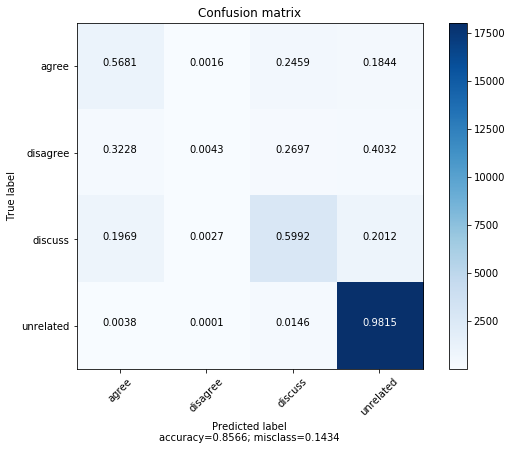

In [62]:
plot_confusion_matrix(cm=matrix1,target_names=['agree', 'disagree', 'discuss', 'unrelated'])

In [ ]:
# accuracy_score(test_labels,prediction)
